In [4]:
import pandas as pd

general_df = pd.read_csv('dataset/example/index.csv', delimiter=',')

# Splitting the 'tags' column into a list of tags
general_df['tags'] = general_df['tags'].apply(lambda x: x.split(';'))

# Function to find all images containing a specific tag
def find_images_with_tag(tag):
    return general_df[general_df['tags'].apply(lambda x: tag in x)]['path'].tolist()

# Example: find all images with the tag 'black'
images_with_black = find_images_with_tag('black')
images_with_black

['img/zebra.png',
 'img/perforated.png',
 'img/grid.png',
 'img/lacelike.png',
 'img/crosshatched.png',
 'img/chequered.png',
 'img/dotted.png']

In [1]:
from feature_operation import hook_feature,FeatureOperator

fo = FeatureOperator()
print(fo.data.label)

[{'number': 0, 'name': '', 'category': {}, 'frequency': 0, 'coverage': 0.0, 'syns': []}, {'number': 1, 'name': 'black-c', 'category': {'color': 62358}, 'frequency': 62358, 'coverage': 11135.320474, 'syns': ['']}, {'number': 2, 'name': 'grey-c', 'category': {'color': 62310}, 'frequency': 62310, 'coverage': 12712.843129, 'syns': ['']}, {'number': 3, 'name': 'white-c', 'category': {'color': 62054}, 'frequency': 62054, 'coverage': 5778.038204, 'syns': ['']}, {'number': 4, 'name': 'brown-c', 'category': {'color': 61583}, 'frequency': 61583, 'coverage': 14549.652454, 'syns': ['']}, {'number': 5, 'name': 'green-c', 'category': {'color': 61508}, 'frequency': 61508, 'coverage': 5049.989735, 'syns': ['']}, {'number': 6, 'name': 'pink-c', 'category': {'color': 60755}, 'frequency': 60755, 'coverage': 1478.518582, 'syns': ['']}, {'number': 7, 'name': 'purple-c', 'category': {'color': 59516}, 'frequency': 59516, 'coverage': 865.041519, 'syns': ['']}, {'number': 8, 'name': 'blue-c', 'category': {'col

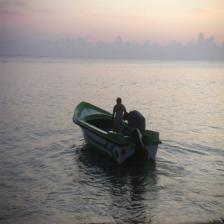

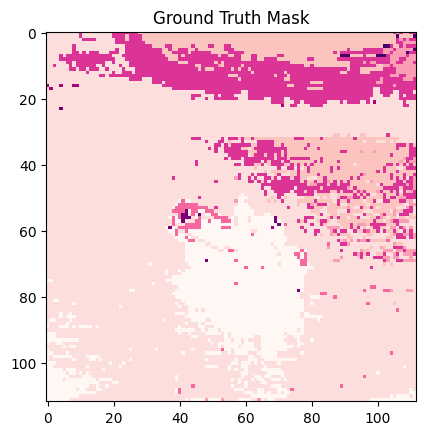

In [57]:
from loader.data_loader import SegmentationData
import settings
import pandas as pd
import numpy as np

data_loader = SegmentationData(settings.DATA_DIRECTORY, categories=settings.CATAGORIES)

# 假设您知道要处理的图像索引和类别
index = 0  # 图像索引
category = 'color'  # 您想要获取 mask 的类别名称

from PIL import Image
df = pd.read_csv('dataset/broden1_224/'+ settings.INDEX_FILE)

img_path = df['image'][index]
img = Image.open('./dataset/broden1_224/images/'+ data_loader.image[index]['image'])
img.show()

# 获取 ground truth mask
ground_truth_mask = data_loader.segmentation_data(category=category,i=index)

# 如果需要显示或进一步处理 mask，可以进行以下操作
import matplotlib.pyplot as plt

plt.imshow(ground_truth_mask, cmap='RdPu')
plt.title('Ground Truth Mask')
plt.show()


In [58]:
def get_label_name_by_code(category, code):
    for label_info in data_loader.category_label[category]:
        if label_info['code'] == code:
            return label_info['name']
    return None

# 使用 ground truth mask 找到所有的 unique labels 并打印它们的名称
unique_labels = np.unique(ground_truth_mask)

label_names = [get_label_name_by_code(category, label) for label in unique_labels]
print("Segmentation map contains the following labels:")
for label, name in zip(unique_labels, label_names):
    print(f"Label {label}: {name}")

Segmentation map contains the following labels:
Label 1: black-c
Label 2: grey-c
Label 3: white-c
Label 4: brown-c
Label 5: green-c
Label 6: pink-c
Label 7: purple-c
Label 8: blue-c
Label 9: yellow-c


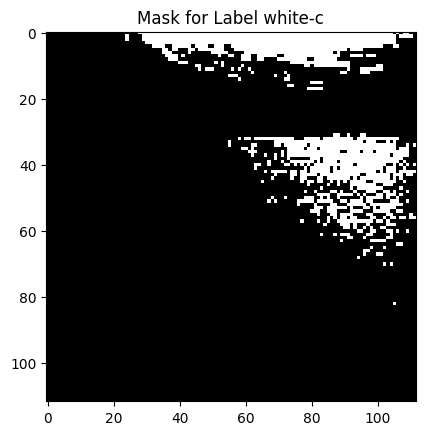

In [60]:
def get_code_by_label_name(category, label_name):
    for label_info in data_loader.category_label[category]:
        if label_info['name'] == label_name:
            return label_info['code']
    return None  # 如果没有找到对应的标签，返回 None

# 假设您感兴趣的标签名称
label_name_of_interest = 'white-c'  # 例如，假设我们关心的标签名称为'tree'

# 获取该标签的代码
label_code_of_interest = get_code_by_label_name(category, label_name_of_interest)

if label_code_of_interest is not None:
    # 创建一个新的 mask，只保留感兴趣的标签，其他位置设置为0
    mask_of_interest = np.where(ground_truth_mask == label_code_of_interest, ground_truth_mask, 0)

    # 显示这个新的 mask
    import matplotlib.pyplot as plt

    plt.imshow(mask_of_interest, cmap='gray')  # 使用灰度图显示，因为只有感兴趣的标签和背景
    plt.title(f'Mask for Label {label_name_of_interest}')
    plt.show()
else:
    print(f'Label "{label_name_of_interest}" not found in the category "{category}".')